In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def get_modified_KGE(obs, sim):
    ind = (~np.isnan(obs)) & (~np.isnan(sim))
    obs = obs[ind]
    sim = sim[ind]

    try:
        sd_sim = np.std(sim, ddof=1)
        sd_obs = np.std(obs, ddof=1)
        m_sim = np.mean(sim)
        m_obs = np.mean(obs)
        r = (np.corrcoef(sim, obs))[0, 1]
        relvar = (float(sd_sim)/float(m_sim))/(float(sd_obs)/float(m_obs))
        bias = float(m_sim)/float(m_obs)
        kge = 1.0 - np.sqrt((r-1)**2 + (relvar-1)**2 + (bias-1)**2)
    except:
        kge = np.nan

    return kge

In [2]:
df_info = pd.read_csv('/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info.csv')
df_info.head()

,hru_id,ann_P,lon_cen,lat_cen,AREA,elev_mean,ave_T,july_T,Perimeter,Source,...,RawTDXarea,HSTDXarea,MHTDXarea,RawCAMELSbias,RawTDXbias,HSTDXbias,MHTDXbias,final_bias,geometry,file_obsQ
0,1013500,0.0,-68.56551,47.01169,2.303988e+09,277.493490,NaN,NaN,647993,RawTDX,...,2246.946668,2246.628415,2246.132802,0.022767,-0.002554,-0.002695,-0.002915,0.002554,POLYGON ((-68.84000529335947 46.73746031546882...,/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/C...
1,1022500,0.0,-68.07313,44.79691,6.203873e+08,103.604200,NaN,NaN,312624,HSTDX,...,615.173865,586.427404,586.602450,0.081568,0.072479,0.022363,0.022668,0.022363,POLYGON ((-68.13005554673525 44.64716666195261...,/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/C...
2,1030500,0.0,-68.14985,45.80527,3.676155e+09,174.433896,NaN,NaN,662248,RawCAMELS,...,3654.475429,3653.788946,3653.845830,-0.000004,-0.005901,-0.006088,-0.006073,0.000004,POLYGON ((-68.35800170861474 45.67902755716805...,/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/C...
3,1031500,0.0,-69.58119,45.23568,7.665447e+08,304.743490,NaN,NaN,309614,RawCAMELS,...,775.632787,772.001421,772.168545,-0.003258,0.008560,0.003838,0.004055,0.003258,POLYGON ((-69.67646789509475 45.14558029212971...,/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/C...
4,1047000,0.0,-70.16213,44.98744,9.049562e+08,379.779978,NaN,NaN,310157,RawCAMELS,...,914.491471,914.237495,913.814091,-0.004558,0.005931,0.005651,0.005185,0.004558,POLYGON ((-70.10847473135688 45.21669387774366...,/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/C...


In [3]:
kge=np.nan * np.zeros(627)
for i in range(627):
    file=f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{i}_MOASMOcalib/param_sets/surrogate_model_for_iter0_CV_kge.csv'
    if os.path.isfile(file):
        df=pd.read_csv(file)
        kge[i] = df.loc[df['Fold']=='Mean']['KGE_Score'].values

In [4]:
kge = np.array(kge)
print('basin num:', len(kge))
print('mean kge:', np.nanmean(kge))
print('median kge:', np.nanmedian(kge))

basin num: 627
mean kge: 0.8011107446937956
median kge: 0.8456596796749842


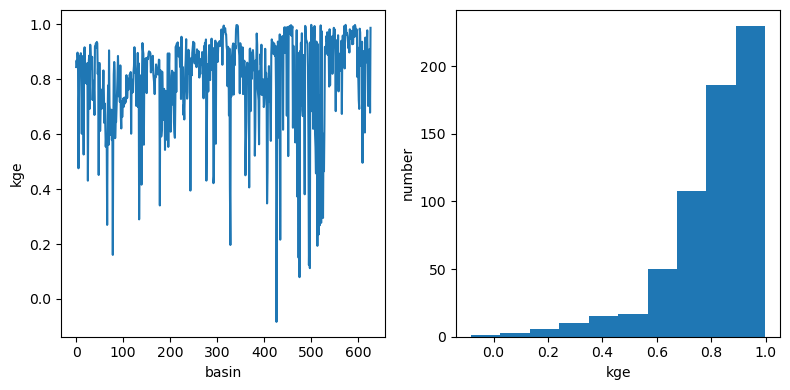

In [5]:
fig = plt.figure(figsize=[8, 4])

fig.add_subplot(1,2,1)
plt.plot(kge)
plt.xlabel('basin')
plt.ylabel('kge')

fig.add_subplot(1,2,2)
plt.hist(kge)
plt.xlabel('kge')
plt.ylabel('number')

plt.tight_layout()
plt.show()


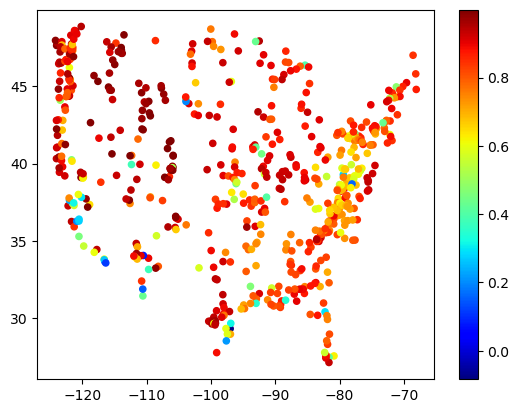

In [6]:
lat = df_info['lat_cen'].values
lon = df_info['lon_cen'].values
plt.scatter(lon, lat, 20, kge, cmap='jet')
plt.colorbar()
plt.show()

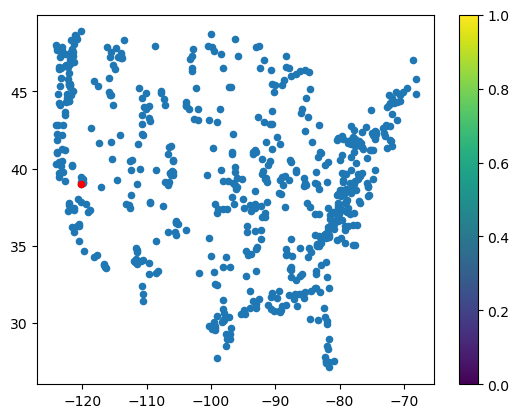

,hru_id,ann_P,lon_cen,lat_cen,AREA,elev_mean,ave_T,july_T,Perimeter,Source,...,RawTDXarea,HSTDXarea,MHTDXarea,RawCAMELSbias,RawTDXbias,HSTDXbias,MHTDXbias,final_bias,geometry,file_obsQ
502,10336645,0.0,-120.16849,39.02197,20093583.5,2216.315789,NaN,NaN,43769,MHTDX,...,28.927022,19.152144,19.245503,0.025183,0.475868,-0.02285,-0.018087,0.018087,POLYGON ((-120.13883333333399 39.0396110938062...,/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/C...


In [7]:
lat = df_info['lat_cen'].values
lon = df_info['lon_cen'].values
plt.scatter(lon, lat, 20)
plt.scatter(lon[502], lat[502], 20, 'r')
plt.colorbar()
plt.show()
display(df_info.loc[[502]])

# check a basin with low performance

In [8]:
# index_check = np.argsort(kge)[4]

index_check = 0

print(kge[index_check], index_check)

0.8448884589946504 0


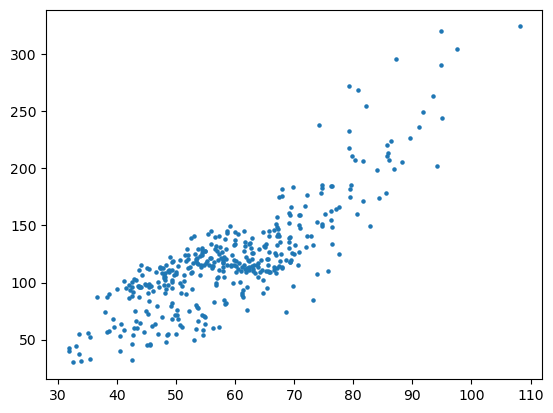

In [9]:
file=f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{index_check}_MOASMOcalib/ctsm_outputs/iter0_all_metric.csv'
dfc_met = pd.read_csv(file)

file=f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{index_check}_MOASMOcalib/ctsm_outputs/iter0_all_meanparam.csv'
dfc_param = pd.read_csv(file)

plt.scatter(dfc_met['metric1'], dfc_met['metric2'], 5)

In [10]:
params = dfc_param.values
metrics_use = dfc_met.values

In [12]:
##### RF
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np


def train_and_evaluate_with_predictions(params, metrics_use):
	print('Processing...')

	cv = KFold(n_splits=5, shuffle=True, random_state=42)
	kge_scores = []  # To store the KGE score for each fold

	# Initialize the Random Forest regressor
	model = RandomForestRegressor(random_state=42)

	for train_idx, test_idx in cv.split(params):
		X_train, X_test = params[train_idx], params[test_idx]
		y_train, y_test = metrics_use[train_idx], metrics_use[test_idx]

		model.fit(X_train, y_train)  # Fit the model on the training data
		y_pred = model.predict(X_test)  # Predict on the test set

		# Calculate KGE for each column (target) and take the mean
		fold_kge_scores = [get_modified_KGE(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
		fold_mean_kge = np.nanmean(fold_kge_scores)  # Compute the mean KGE score for this fold, ignoring any NaN values
		kge_scores.append(fold_mean_kge)

	mean_kge_score = np.mean(kge_scores)  # Calculate the mean KGE score across all folds

	return mean_kge_score

mean_kge_score = train_and_evaluate_with_predictions(params, metrics_use)
print('Mean KGE score:', mean_kge_score)


Processing...
Mean KGE score: 0.6907717823212288


In [65]:
######## GPR
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, Matern
from sklearn.model_selection import KFold
import numpy as np

def train_and_evaluate_with_predictions_gpr(params, metrics_use):
	print('Processing...')

	cv = KFold(n_splits=5, shuffle=True, random_state=42)
	kge_scores = []  # To store the KGE score for each fold

	# Define the kernel with Matern function
	kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5)
	
	# Initialize the GPR model
	model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True, random_state=42)

	for train_idx, test_idx in cv.split(params):
		X_train, X_test = params[train_idx], params[test_idx]
		y_train, y_test = metrics_use[train_idx], metrics_use[test_idx]

		# Normalize features
		scaler = MinMaxScaler().fit(X_train)
		X_train_scaled = scaler.transform(X_train)
		X_test_scaled = scaler.transform(X_test)

		model.fit(X_train_scaled, y_train)  # Fit the model on the training data
		y_pred = model.predict(X_test_scaled)  # Predict on the test set

		# Calculate KGE for each column (target) and take the mean
		fold_kge_scores = [get_modified_KGE(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
		fold_mean_kge = np.nanmean(fold_kge_scores)  # Compute the mean KGE score for this fold, ignoring any NaN values
		kge_scores.append(fold_mean_kge)

	mean_kge_score = np.mean(kge_scores)  # Calculate the mean KGE score across all folds

	return mean_kge_score

# Execute the function with your data
mean_kge_score_gpr = train_and_evaluate_with_predictions_gpr(params, metrics_use)
print('Mean KGE score for GPR:', mean_kge_score_gpr)


Processing...
Mean KGE score for GPR: 0.30449217446910837
